In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
a = np.array([0,0,1,1])
b = np.array([0,1,0,1])

y_xor = np.array([[0,1,1,0]])

In [4]:
#combining inputs into 1 array

total_input = []

total_input = [a, b]

total_input = np.array(total_input)

In [6]:
total_input.shape

(2, 4)

In [12]:
#activation function
def sigm(x):
    return 1/(1+ np.exp(-x))

input_neurons, hidden_neurons, output_neurons = 2,2,1

#no of training examples
samples = total_input.shape[1]

#learning rate
alpha = 0.1

np.random.seed(42)

In [8]:
#initializing weights
w1 = np.random.rand(hidden_neurons, input_neurons)
w2 = np.random.rand(output_neurons, hidden_neurons)

In [9]:
#forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1, x)
    a1 = sigm(z1)
    z2 = np.dot(w2, a1)
    a2 = sigm(z2)
    return z1,a1,z2,a2

#backward propagation
def backward_prop(m, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T)/m
    dz1 = np.dot(w2.T, dz2) * a1 * (1-a1)
    dw1 = np.dot(dz1, total_input.T)/m
    dw1 = np.reshape(dw1, w1.shape)

    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1
    
    

Text(0, 0.5, 'Loss value')

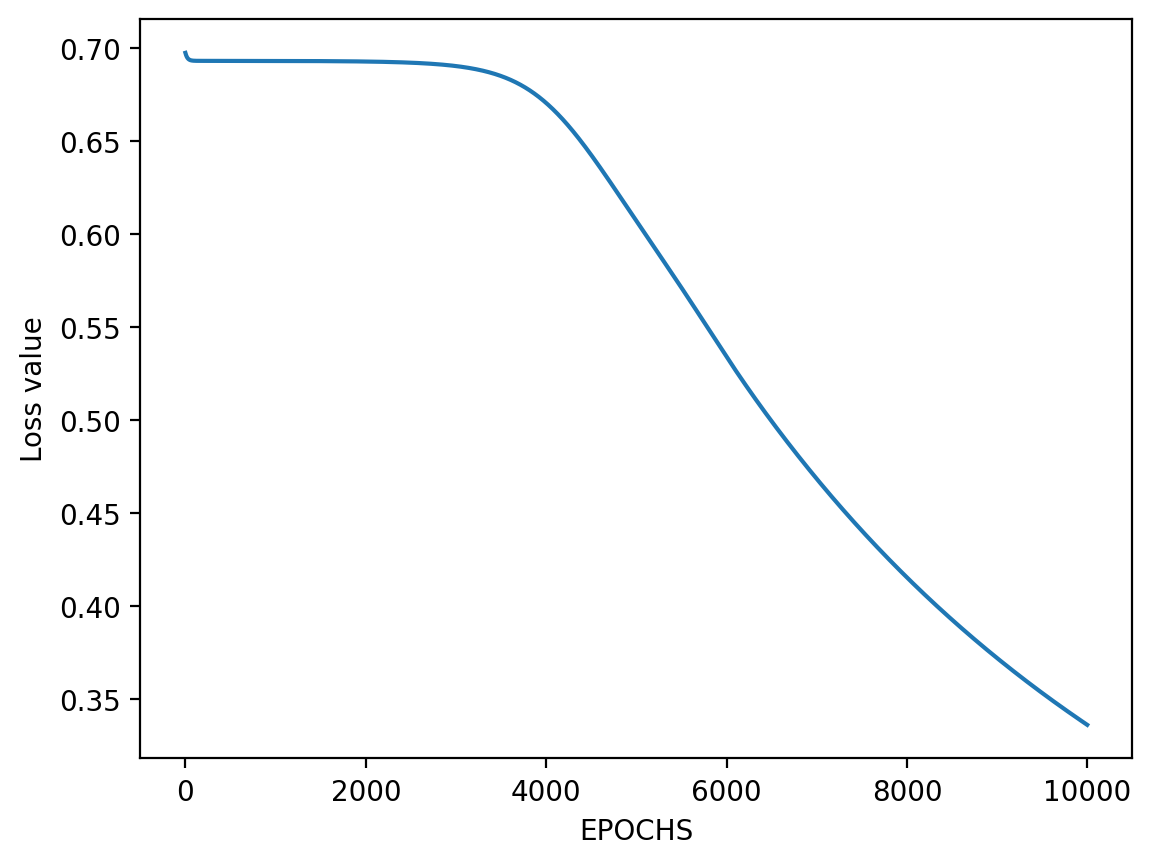

In [14]:
losses = []
iterations = 10000

for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, w2, total_input)
    loss = -(1/samples)*np.sum(y_xor*np.log(a2)+(1-y_xor)*np.log(1-a2))
    losses.append(loss)
    da2, dw2, dz1, dw1 = backward_prop(samples, w1, w2, z1, a1, z2, a2, y_xor)
    w2 = w2-alpha*dw2
    w1 = w1-alpha*dw1

#plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [15]:
# Creating the predict function

def predict(w1,w2,input):
    z1, a1, z2, a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)

    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [16]:
test = np.array([[0],[0]])
predict(w1,w2,test)

test = np.array([[0],[1]])
predict(w1,w2,test)

test = np.array([[1],[0]])
predict(w1,w2,test)

test = np.array([[1],[1]])
predict(w1,w2,test)

For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 0] output is 1
For input [1, 1] output is 0
